In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score, log_loss

In [106]:
base_dir = '/data/ddmg/scate/multiple_shortcut/waterbirds'
pixel = 128 
batch_size = 64 
py1y0 = 0.9
seed_list = [0]

In [107]:
def get_per_dist_metrics(df):
    all_results = []
    for dist in [0.1, 0.5, 0.9]:
        curr_df = df[(df.dist==dist)]
        curr_eval = {'dist': dist}
        curr_eval['auc'] = roc_auc_score(curr_df.y0, curr_df.predictions)
        curr_eval['acc'] = np.mean(1.0 * (curr_df.y0 == curr_df.pred_class))
        curr_eval['log_loss'] = log_loss(curr_df.y0, curr_df.predictions)
        
        all_results.append(curr_eval)
    return pd.DataFrame(all_results)
    

def get_all_dist_metrics(random_seeds, model_name, xv_mode, v_dim):
    all_eval = []
    for random_seed in random_seeds: 
        curr_pred = pd.read_csv(
            (f'{base_dir}/final_models/opt_pred_rs{random_seed}_{model_name}_{xv_mode}'
             f'_pix{pixel}_bs{batch_size}_vdim{v_dim}.csv')) 
        all_eval.append(get_per_dist_metrics(curr_pred))
        
    all_eval = pd.concat(all_eval, ignore_index=True)
    all_eval = all_eval.groupby('dist').agg(['mean', 'std']).reset_index()
    all_eval.columns = ['_'.join(col).strip() for col in all_eval.columns.values]
    all_eval.rename(columns={'dist_': 'dist'}, inplace=True)
    return all_eval
        
        


In [108]:
model_name = 'unweighted_baseline'
xv_mode = 'classic'
v_dim = 0
uw_eval = get_all_dist_metrics(seed_list, model_name, xv_mode, v_dim)

In [109]:
model_name = 'weighted_baseline'
xv_mode = 'classic'
v_dim = 0 
w0_eval = get_all_dist_metrics(seed_list, model_name, xv_mode, v_dim)


In [110]:
model_name = 'weighted_baseline'
xv_mode = 'classic'
v_dim = 10 
w10_eval = get_all_dist_metrics(seed_list, model_name, xv_mode, v_dim)


In [111]:
model_name = 'weighted_hsic'
xv_mode = 'two_step'
v_dim = 0
wh0_eval = get_all_dist_metrics(seed_list, model_name, xv_mode, v_dim)

In [112]:
model_name = 'weighted_hsic'
xv_mode = 'two_step'
v_dim = 10
wh10_eval = get_all_dist_metrics(seed_list, model_name, xv_mode, v_dim)

In [113]:
eval_perf = {
    'uw_dnn': {'perf': uw_eval, 'label': "DNN", 'color':'black'  },  
    'w0_dnn': {'perf': w0_eval, 'label': "w0-DNN", 'color':'#ABABAB'}, 
    'w10_dnn': {'perf': w10_eval, 'label': "w10-DNN", 'color':'green'}, 
    'w0_hsic': {'perf': wh0_eval, 'label': "Ours0", 'color':'#C85200'}, 
    'w10_hsic': {'perf': wh10_eval, 'label': "Ours10", 'color':'purple'}, 
}

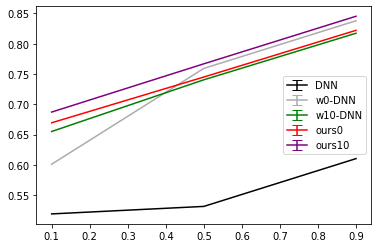

In [114]:
metric = 'auc'
stat = 'mean'
plt.errorbar(uw_eval.dist, uw_eval[f'{metric}_{stat}'],
             yerr= uw_eval[f'{metric}_std'], label='DNN', 
             capsize= 5, color='black')
plt.errorbar(w0_eval.dist, w0_eval[f'{metric}_{stat}'], 
             yerr= w0_eval[f'{metric}_std'], label='w0-DNN', 
             capsize= 5, color = '#ABABAB')
plt.errorbar(w10_eval.dist, w10_eval[f'{metric}_{stat}'], 
             yerr= w10_eval[f'{metric}_std'], label='w10-DNN', 
             capsize= 5, color = 'green')
plt.errorbar(wh0_eval.dist, wh0_eval[f'{metric}_{stat}'], 
             yerr= wh0_eval[f'{metric}_std'], label='ours0', 
             capsize= 5, color='red')
plt.errorbar(wh10_eval.dist, wh10_eval[f'{metric}_{stat}'], 
             yerr= wh10_eval[f'{metric}_std'], label='ours10', 
             capsize= 5, color='purple')
plt.legend()

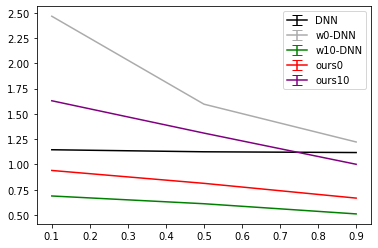

In [115]:
metric = 'log_loss'

stat = 'mean'
plt.errorbar(uw_eval.dist, uw_eval[f'{metric}_{stat}'],
             yerr= uw_eval[f'{metric}_std'], label='DNN', 
             capsize= 5, color='black')
plt.errorbar(w0_eval.dist, w0_eval[f'{metric}_{stat}'], 
             yerr= w0_eval[f'{metric}_std'], label='w0-DNN', 
             capsize= 5, color = '#ABABAB')
plt.errorbar(w10_eval.dist, w10_eval[f'{metric}_{stat}'], 
             yerr= w10_eval[f'{metric}_std'], label='w10-DNN', 
             capsize= 5, color = 'green')
plt.errorbar(wh0_eval.dist, wh0_eval[f'{metric}_{stat}'], 
             yerr= wh0_eval[f'{metric}_std'], label='ours0', 
             capsize= 5, color='red')
plt.errorbar(wh10_eval.dist, wh10_eval[f'{metric}_{stat}'], 
             yerr= wh10_eval[f'{metric}_std'], label='ours10', 
             capsize= 5, color='purple')
plt.legend()

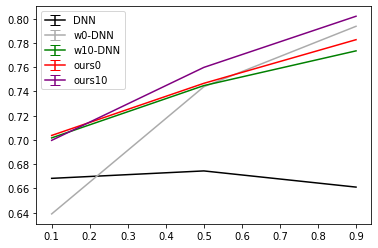

In [116]:
metric = 'acc'

stat = 'mean'
plt.errorbar(uw_eval.dist, uw_eval[f'{metric}_{stat}'],
             yerr= uw_eval[f'{metric}_std'], label='DNN', 
             capsize= 5, color='black')
plt.errorbar(w0_eval.dist, w0_eval[f'{metric}_{stat}'], 
             yerr= w0_eval[f'{metric}_std'], label='w0-DNN', 
             capsize= 5, color = '#ABABAB')
plt.errorbar(w10_eval.dist, w10_eval[f'{metric}_{stat}'], 
             yerr= w10_eval[f'{metric}_std'], label='w10-DNN', 
             capsize= 5, color = 'green')
plt.errorbar(wh0_eval.dist, wh0_eval[f'{metric}_{stat}'], 
             yerr= wh0_eval[f'{metric}_std'], label='ours0', 
             capsize= 5, color='red')
plt.errorbar(wh10_eval.dist, wh10_eval[f'{metric}_{stat}'], 
             yerr= wh10_eval[f'{metric}_std'], label='ours10', 
             capsize= 5, color='purple')
plt.legend()

In [117]:
random_seed = 0
model_name = 'weighted_hsic'
xv_mode = 'two_step'

w0_pred = pd.read_csv(
    (f'{base_dir}/final_models/opt_pred_rs{random_seed}_{model_name}_{xv_mode}'
     f'_pix{pixel}_bs{batch_size}_vdim0.csv')) 

w10_pred = pd.read_csv(
    (f'{base_dir}/final_models/opt_pred_rs{random_seed}_{model_name}_{xv_mode}'
     f'_pix{pixel}_bs{batch_size}_vdim10.csv')) 
w0_pred = w0_pred[(w0_pred.dist==0.1)]
w10_pred = w10_pred[(w10_pred.dist==0.1)]
print("full auroc")
print(
    roc_auc_score(w0_pred.y0, w0_pred.predictions), 
    roc_auc_score(w10_pred.y0, w10_pred.predictions))


w0_ts_weights = w0_pred.groupby([f'y{i}' for i in range(13)]).agg('size').reset_index()
w0_ts_weights.columns = [f'y{i}' for i in range(13)] + ['gsize']
w0_ts_weights['ts_weights']  = 1.0 / w0_ts_weights['gsize']
w0_pred = w0_pred.merge(w0_ts_weights, on = [f'y{i}' for i in range(13)])

w10_ts_weights = w10_pred.groupby([f'y{i}' for i in range(13)]).agg('size').reset_index()
w10_ts_weights.columns = [f'y{i}' for i in range(13)] + ['gsize']
w10_ts_weights['ts_weights']  = 1.0 / w10_ts_weights['gsize']
w10_pred = w10_pred.merge(w10_ts_weights, on = [f'y{i}' for i in range(13)])
print("weighted auroc")
print(roc_auc_score(w0_pred.y0, w0_pred.predictions, 
              sample_weight=w0_pred.ts_weights),roc_auc_score(w10_pred.y0, 
                w10_pred.predictions, sample_weight=w10_pred.ts_weights))

print("small group auroc")
print(roc_auc_score(
    w0_pred.y0[(w0_pred.gsize <=1)], w0_pred.predictions[(w0_pred.gsize <=1)]), roc_auc_score(
    w10_pred.y0[(w10_pred.gsize <=1)], w10_pred.predictions[(w10_pred.gsize <=1)]))

full auroc
0.6694992296577001 0.6871836094125303
weighted auroc
0.7307315682376883 0.760615670934325
small group auroc
0.7980769230769231 0.7403846153846153


(0.8252233339610604, 0.8252233339610604)

In [257]:
roc_auc_score(
    w0_pred.y0[(w0_pred.gsize <=1)], w0_pred.predictions[(w0_pred.gsize <=1)]), roc_auc_score(
    w10_pred.y0[(w10_pred.gsize <=1)], w10_pred.predictions[(w10_pred.gsize <=1)])

(0.78125, 0.703125)

In [258]:
print(
    w0_pred[['predictions']][(w0_pred.gsize <=1) & (w0_pred.y0 ==1)].mean(), 
    w0_pred[['predictions']][(w0_pred.gsize <=1) & (w0_pred.y0 ==1)].var()
)

predictions    0.499356
dtype: float64 predictions    0.284936
dtype: float64


In [259]:
print(
    w10_pred[['predictions']][(w10_pred.gsize <=1) & (w10_pred.y0 ==1)].mean(), 
    w10_pred[['predictions']][(w10_pred.gsize <=1) & (w10_pred.y0 ==1)].var()
)

predictions    0.420546
dtype: float64 predictions    0.216019
dtype: float64


In [260]:
print(
    w0_pred[['predictions']][(w0_pred.gsize <=1) & (w0_pred.y0 ==0)].mean(), 
    w0_pred[['predictions']][(w0_pred.gsize <=1) & (w0_pred.y0 ==0)].var()
)

predictions    0.00054
dtype: float64 predictions    0.000002
dtype: float64


In [261]:
print(
    w10_pred[['predictions']][(w10_pred.gsize <=1) & (w10_pred.y0 ==0)].mean(), 
    w10_pred[['predictions']][(w10_pred.gsize <=1) & (w10_pred.y0 ==0)].var()
)

predictions    0.000294
dtype: float64 predictions    2.873716e-07
dtype: float64
